# Package imports, global variables and functions

In [2]:
import mysql.connector
import json
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 15]

host = "localhost"
un = "root"
pw=""
db_name = "yelp"

def mysql_result_to_df(result, cursor):
    field_names = [i[0] for i in mycursor.description]
    return pd.DataFrame(myresult, columns=field_names)

def df_to_csv(df, fp, ext=".csv", na_rep=""):
    try:
        df.to_csv(fp + ext, encoding="utf-8", header = True,\
            doublequote = True, sep=",", index=False, na_rep=na_rep)
    except Exception as e:
        print("Error: {}".format(str(e)))

fp = "C:/Users/Tolis/Documents/Data Analytics Cource/CKME136 X10/Project/data/final/summary"

## Connect to yelp db and load table

In [3]:
mydb = mysql.connector.connect(
  host=host,
  user=un,
  passwd=pw,
  database=db_name
)

mycursor = mydb.cursor()

mycursor.execute("SELECT * FROM checkin")

myresult = mycursor.fetchall()

checkin_df = mysql_result_to_df(myresult, mycursor)

mycursor.close()
mydb.close()

In [4]:
print(checkin_df[0:10])

              business_id  checkin_count
0  --1UhMGODdWsrMastO9DZw              6
1  --6MefnULPED_I942VcFNA            167
2  --7zmmkVg-IMGaXbuVd0SQ            180
3  --8LPVSo5i0Oo61X01sV9A              1
4  --9QQLMTbFzLJ_oT-ON3Xw             37
5  --9e1ONYQuAa-CB_Rrw7Tw           2770
6  --DaPTJW3-tB1vP-PfdTEg             95
7  --DdmeR16TRb3LsjG0ejrQ             30
8  --EF5N7P70J_UYBTPypYlA              2
9  --EX4rRznJrltyn-34Jz1w             14


In [5]:
#Replace empty strings and json objects to null
checkin_df = checkin_df.replace(r'^\s*$', np.nan, regex=True)
checkin_df = checkin_df.replace(r'^{}*$', np.nan, regex=True)

## Numeric summaries

In [6]:
#Description of quantitative fields.
df_description_number = checkin_df.describe(include=[np.number])
print(df_description_number)

       checkin_count
count  161950.000000
mean      117.870627
std       733.721561
min         1.000000
25%         5.000000
50%        16.000000
75%        65.000000
max    143061.000000


In [7]:
#Row and col counts.
row_count = checkin_df.shape[0]
col_count = checkin_df.shape[1]
print(checkin_df.shape)

(161950, 2)


In [8]:
#Summary of NULLS
#Doesn't seem to be any nulls
null_columns=checkin_df.columns[checkin_df.isnull().any()]
df_description_nulls=checkin_df[null_columns].isnull().sum()
df_description_nulls = pd.DataFrame(df_description_nulls, columns=["Null Count"])
df_description_nulls["Null Percent"] = df_description_nulls["Null Count"].apply(lambda x: x/row_count)
print(df_description_nulls)

Empty DataFrame
Columns: [Null Count, Null Percent]
Index: []


# Plots

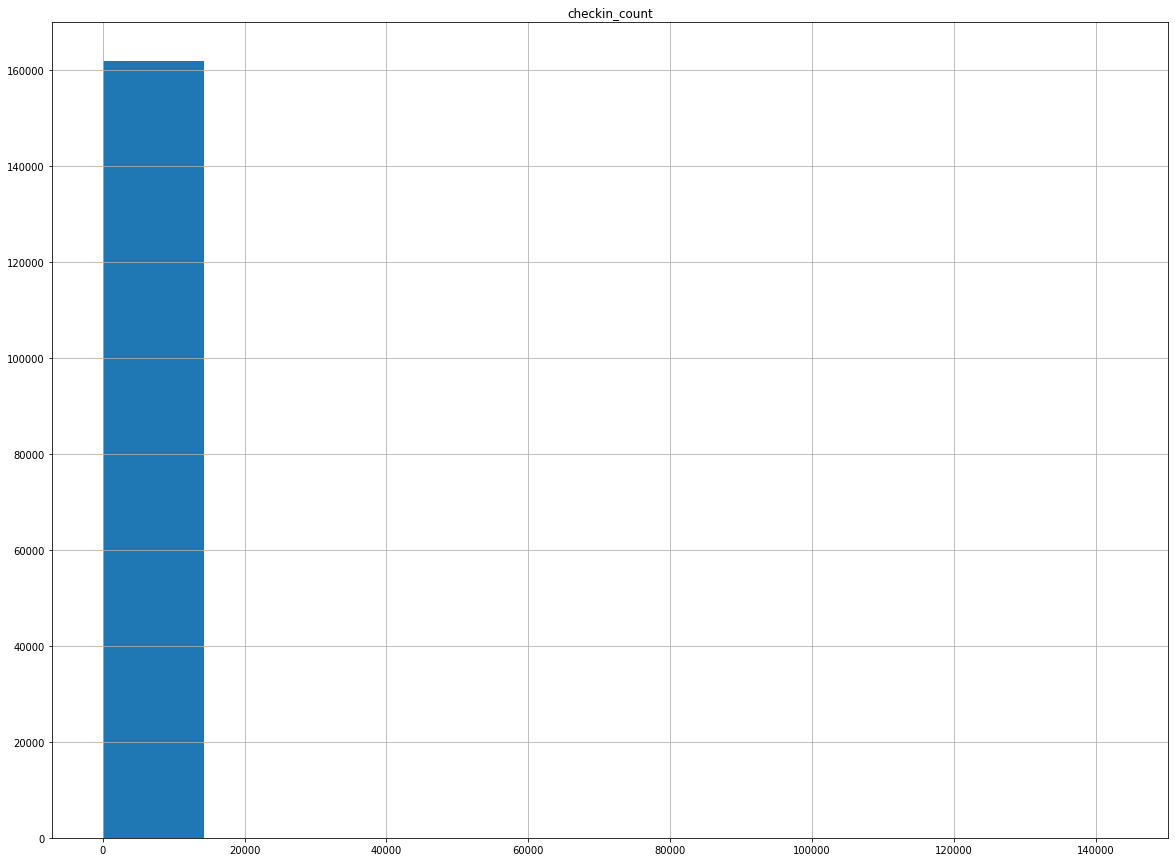

In [9]:
hist = checkin_df.hist()
#Histograms don't really show much here because a lot of the fields are very close together with little spread.
#In addition, most values for these fields seem to be close to 0.

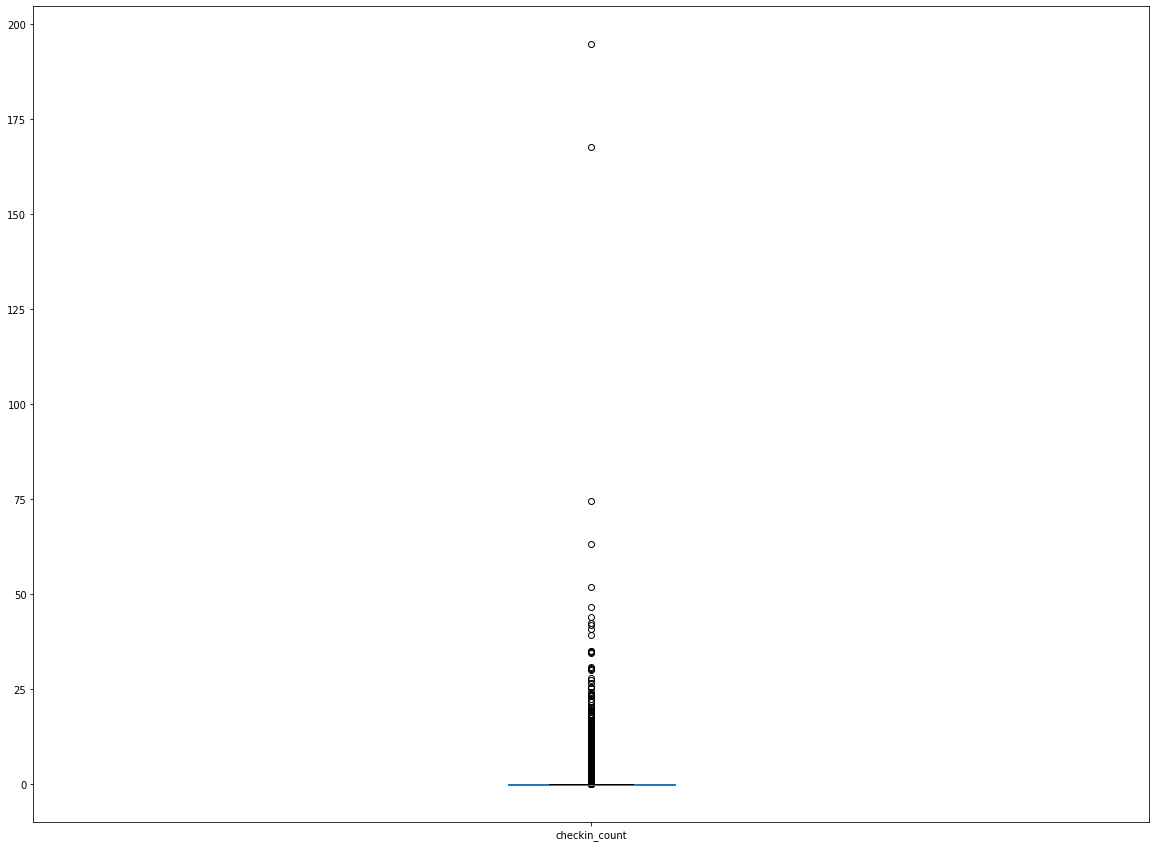

In [10]:
#Scale and center data to compare variance in side-by-side boxplots, and to easily spot outliers.
df_center = (checkin_df["checkin_count"] - checkin_df["checkin_count"].mean())
df_scale = (df_center - df_center.mean())/df_center.std()
df_scale.plot.box();
#A lot of outlier and extremes. These will have to be treated prior to analysis.

In [11]:
#Clean up and save description csv.
#The plots can be obtained via screenshot.

#To make sure field names make it in output csv
row_labels = df_description_nulls.index.values
df_description_nulls.insert (0, "Field", row_labels)
df_to_csv(df_description_nulls, fp + "/checkin_desc_nulls", ext=".csv", na_rep="")

row_labels = df_description_number.index.values
df_description_number.insert (0, "Param", row_labels)
df_to_csv(df_description_number, fp + "/checkin_desc_number", ext=".csv", na_rep="")
checkin_df = None